In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
im = Image.open('xray.png')
im.save('xray.tif')

In [4]:
img = Image.open('xray.tif')

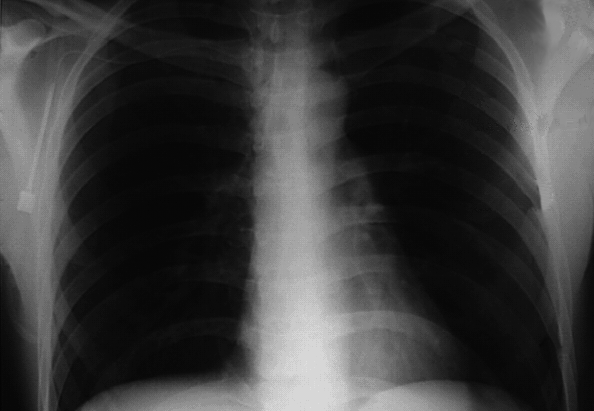

In [5]:
img

In [6]:
npFFT = np.fft.fft2(img) # Calculate FFT
npFFTS = np.fft.fftshift(npFFT)  # Shift the FFT to center it

In [7]:
# high-pass gaussian filter
(P,Q) = npFFTS.shape[:2]
H = np.zeros((P,Q))
D0 = 40
for u in range(P):
    for v in range(Q):
        H[u, v] = 1.0 - np.exp(- ((u - P / 2.0) ** 2 + (v - Q / 2.0) ** 2) / (2 * (D0 ** 2)))
k1 = 0.5 ; k2 = 0.75
HFEfilt = k1 + k2 * H # Apply High-frequency emphasis

In [8]:
# Apply HFE filter to FFT of original image
HFE = HFEfilt * npFFTS[:,:,0]

In [12]:
np.fft.ifft2(HFE)

array([[-1.89139882e+02+2.22044605e-15j,  1.84713079e+02-1.85962357e-15j,
        -1.81305036e+02+4.16333634e-16j, ...,
         1.91284453e+02-8.63198402e-15j, -1.93372871e+02+1.04638520e-14j,
         1.94040596e+02-1.02973186e-14j],
       [-9.73853313e+00-3.67305886e+01j,  8.86169216e+00+3.56199842e+01j,
        -1.12807857e+01-3.71848200e+01j, ...,
         2.43253918e+01+3.95228232e+01j, -2.64581832e+01-4.00656830e+01j,
         2.87169028e+01+4.05621107e+01j],
       [ 1.80045660e+01+1.10187767e+00j, -1.72389889e+01-2.39959479e+00j,
         1.91510338e+01+3.39685332e+00j, ...,
        -1.99850197e+01+3.17876691e-02j,  1.93351366e+01-4.42568621e-01j,
        -1.86247906e+01+1.30121672e+00j],
       ...,
       [ 2.46616184e-01-6.32824415e+00j, -8.23656656e-01+5.53989623e+00j,
         2.29134135e-02-4.45956435e+00j, ...,
         3.78145782e+00-3.33032244e+00j, -4.85248083e+00+4.31720546e+00j,
         6.26218919e+00-5.35156811e+00j],
       [ 1.80045660e+01-1.10187767e+00j, -1.

In [13]:
HFEfinal

array([[-1.89139882e+02+8.16605793e-15j,  1.84713079e+02-5.93082309e-15j,
        -1.81305036e+02+9.58170666e-15j, ...,
         1.91284453e+02-1.66152456e-14j, -1.93372871e+02+1.51399906e-14j,
         1.94040596e+02-1.30984761e-14j],
       [-9.73853313e+00-3.67305886e+01j,  8.86169216e+00+3.56199842e+01j,
        -1.12807857e+01-3.71848200e+01j, ...,
         2.43253918e+01+3.95228232e+01j, -2.64581832e+01-4.00656830e+01j,
         2.87169028e+01+4.05621107e+01j],
       [ 1.80045660e+01+1.10187767e+00j, -1.72389889e+01-2.39959479e+00j,
         1.91510338e+01+3.39685332e+00j, ...,
        -1.99850197e+01+3.17876691e-02j,  1.93351366e+01-4.42568621e-01j,
        -1.86247906e+01+1.30121672e+00j],
       ...,
       [ 2.46616184e-01-6.32824415e+00j, -8.23656656e-01+5.53989623e+00j,
         2.29134135e-02-4.45956435e+00j, ...,
         3.78145782e+00-3.33032244e+00j, -4.85248083e+00+4.31720546e+00j,
         6.26218919e+00-5.35156811e+00j],
       [ 1.80045660e+01-1.10187767e+00j, -1.

In [9]:
"""
Implement 2D-FFT algorithm

Input : Input Image
Output : 2D-FFT of input image
"""
def fft2d(image):
    # 1) compute 1d-fft on columns
    fftcols = np.array([np.fft.fft(row) for row in image]).transpose()

    # 2) next, compute 1d-fft on in the opposite direction (for each row) on the resulting values
    return np.array([np.fft.fft(row) for row in fftcols]).transpose()


#Perform IFFT (implemented here using the np.fft function)
HFEfinal = (np.conjugate(fft2d(np.conjugate(HFE)))) / (P * Q)

In [22]:
def decreaseArray(image1,image2):
    if image1.shape == image2.shape:
        image = image1.copy()
        for i in range(np.shape(image1, 0) - 1):
            for j in range(np.shape(image, - 1):
                image[i][j] = image[i][j] - image2[i][j]
                j = j + 1
            i = i + 1
        return image

In [23]:
unsharpmask = decreaseArray(img,HFEfinal.real)
plt.imshow(unsharpmask,cmap = "gray")

AttributeError: shape